In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
%matplotlib inline

In [36]:
IMG_FOLDER_NAME = '../data/FullImageDataSet/train_sample/'
OUTPUT_H5File = 'trainFile.hdf5'
IMAGE_SIDE = 100

(100, 100, 3)
uint8


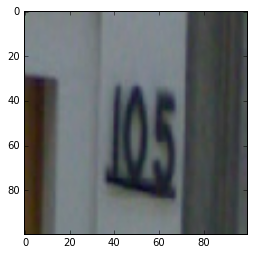

In [39]:
# Read img files from Folder
imgs = []
for imgFile in glob.glob(IMG_FOLDER_NAME + "/*.png"):
    img = Image.open(imgFile)
    img = img.resize((IMAGE_SIDE, IMAGE_SIDE))
    img_raw = np.asarray(img)
    imgs.append(img_raw)
print imgs[0].shape
print imgs[0].dtype
plt.imshow(imgs[0])

In [47]:
# Write to H5 file
h5file = h5py.File(OUTPUT_H5File,"w")
dataset = h5file.create_dataset('cacheName', data=np.array(imgs))
#dataset = h5file.create_dataset('cacheName', (len(imgs), 3, IMAGE_SIDE, IMAGE_SIDE), dtype='uint8')
#for i,img in enumerate(imgs):
#    h5file[i] = img
h5file.close()

In [50]:
# Read hdf5 file and display image
h5file_read = h5py.File(OUTPUT_H5File)
readData= h5file_read.get('cacheName')

In [54]:
img = Image.fromarray(readData[0])

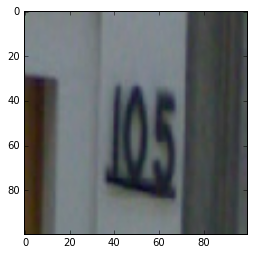

In [55]:
plt.imshow(img)